# EDA on Flight Fares from Mumbai to Bangluru and Vice Versa.

#### Importing libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#### Importing dataset

In [28]:
df = pd.read_csv('/content/flight_data_BOM_BLR.csv') #mumbai-blr


# Data Preprocessing🔬

In [29]:
df.head()

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,"2,307"
1,AirAsia,I5 670,Mumbai,19:55,Bengaluru,21:45,01 h 50 m,"2,773"
2,AirAsia,I5 2992,Mumbai,23:55,Bengaluru,01:45\r\n+ 1 DAY,01 h 50 m,"2,773"
3,IndiGo,6E 5388,Mumbai,21:30,Bengaluru,23:15,01 h 45 m,"2,839"
4,Akasa Air,QP 1103,Mumbai,00:45,Bengaluru,02:20,01 h 35 m,"3,005"


#### Price Column

In [30]:
df["Price"] = df["Price"].str.replace(",","")


In [31]:
df = df.astype({"Price":"int"})


#### DepartingTime

In [32]:
df["DepartingHour"] = df["DepartingTime"].str.split(":").str[0]


In [33]:
df = df.astype({"DepartingHour":"int"})


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FlightName     90 non-null     object
 1   FlightCode     90 non-null     object
 2   DepartingCity  90 non-null     object
 3   DepartingTime  90 non-null     object
 4   ArrivingCity   90 non-null     object
 5   ArrivingTime   90 non-null     object
 6   Duration       90 non-null     object
 7   Price          90 non-null     int64 
 8   DepartingHour  90 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 6.5+ KB


In [35]:
df.describe()

,Price,DepartingHour
count,90.000000,90.000000
mean,6186.188889,12.466667
std,3700.212280,6.515668
min,2307.000000,0.000000
25%,3900.000000,7.000000
50%,4621.000000,12.000000
75%,6721.000000,18.750000
max,20581.000000,23.000000


In [36]:
df.isnull().sum()

FlightName       0
FlightCode       0
DepartingCity    0
DepartingTime    0
ArrivingCity     0
ArrivingTime     0
Duration         0
Price            0
DepartingHour    0
dtype: int64

In [37]:
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price,DepartingHour
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307,3
1,AirAsia,I5 670,Mumbai,19:55,Bengaluru,21:45,01 h 50 m,2773,19
2,AirAsia,I5 2992,Mumbai,23:55,Bengaluru,01:45\r\n+ 1 DAY,01 h 50 m,2773,23
3,IndiGo,6E 5388,Mumbai,21:30,Bengaluru,23:15,01 h 45 m,2839,21
4,Akasa Air,QP 1103,Mumbai,00:45,Bengaluru,02:20,01 h 35 m,3005,0
...,...,...,...,...,...,...,...,...,...
85,Vistara,UK 840,Bengaluru,21:35,Mumbai,23:20,01 h 45 m,11038,21
86,Vistara,UK 850,Bengaluru,19:55,Mumbai,21:35,01 h 40 m,11934,19
87,Vistara,UK 864,Bengaluru,19:00,Mumbai,20:35,01 h 35 m,14596,19
88,Vistara,UK 864,Bengaluru,19:00,Mumbai,20:35,01 h 35 m,14596,19


# Data Visualization

#### Price Distribution

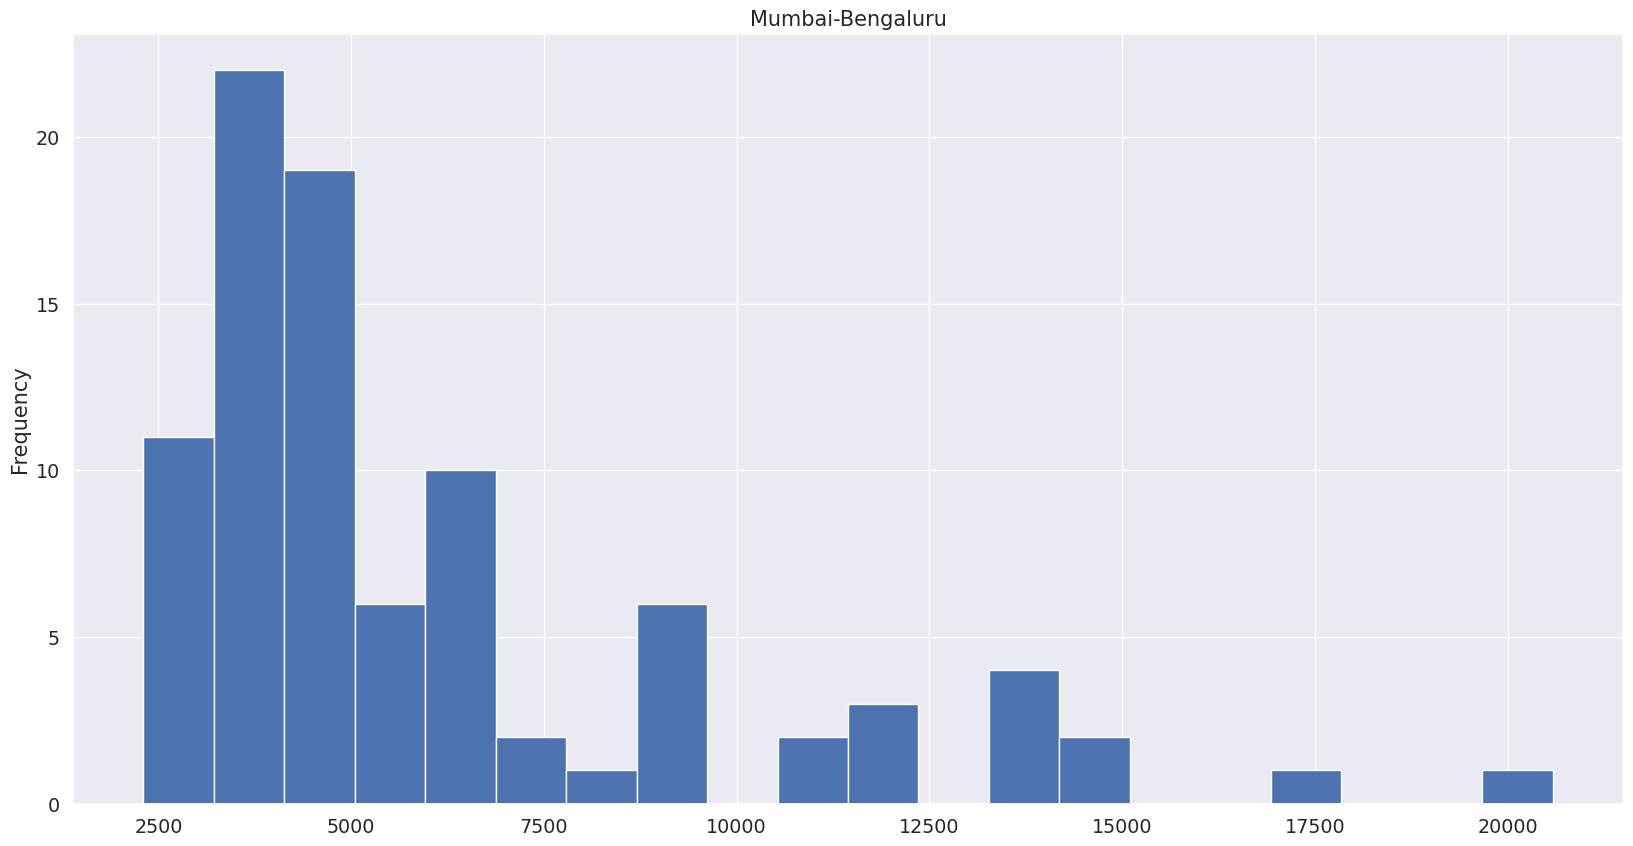

In [38]:
plt.title("Mumbai-Bengaluru")
df["Price"].plot(kind='hist',bins=20)
plt.show()

Most of the pricing is between 2000 and 5000.

#### Departing Hour Vs Price

<Axes: xlabel='DepartingHour', ylabel='Price'>

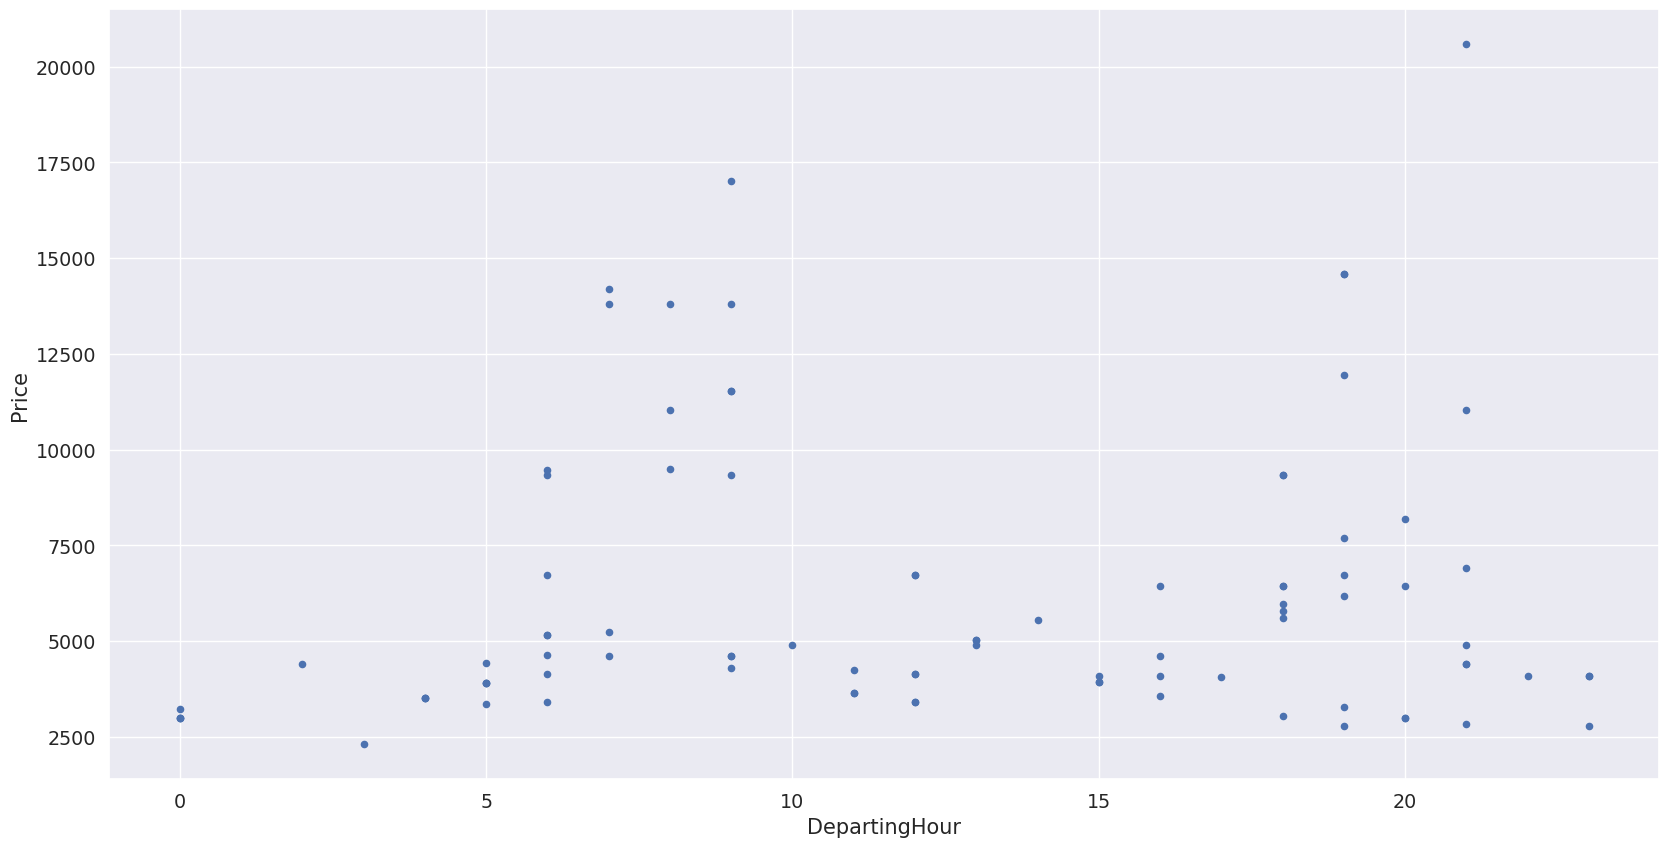

In [39]:
df.plot.scatter(x='DepartingHour',y='Price')

# Mumbai(BOM) ↔️ Bengaluru(BLR)

#### Flights in route

array([<Axes: >], dtype=object)

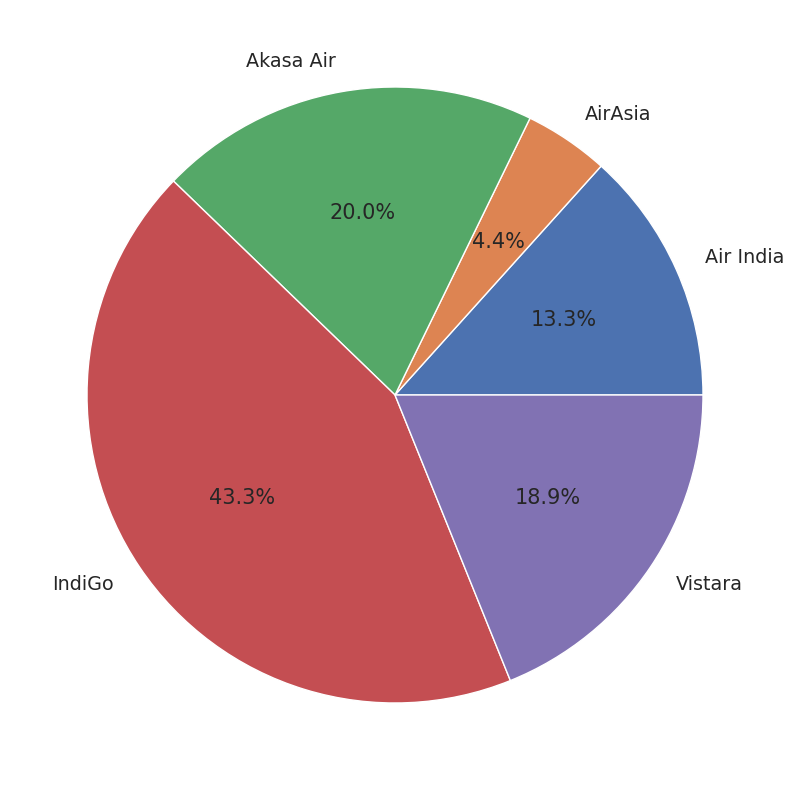

In [48]:
df.groupby("FlightName").size().plot(kind='pie',autopct='%1.1f%%',subplots=True)

Indigo is the most used flight

#### Average Price per flight in route

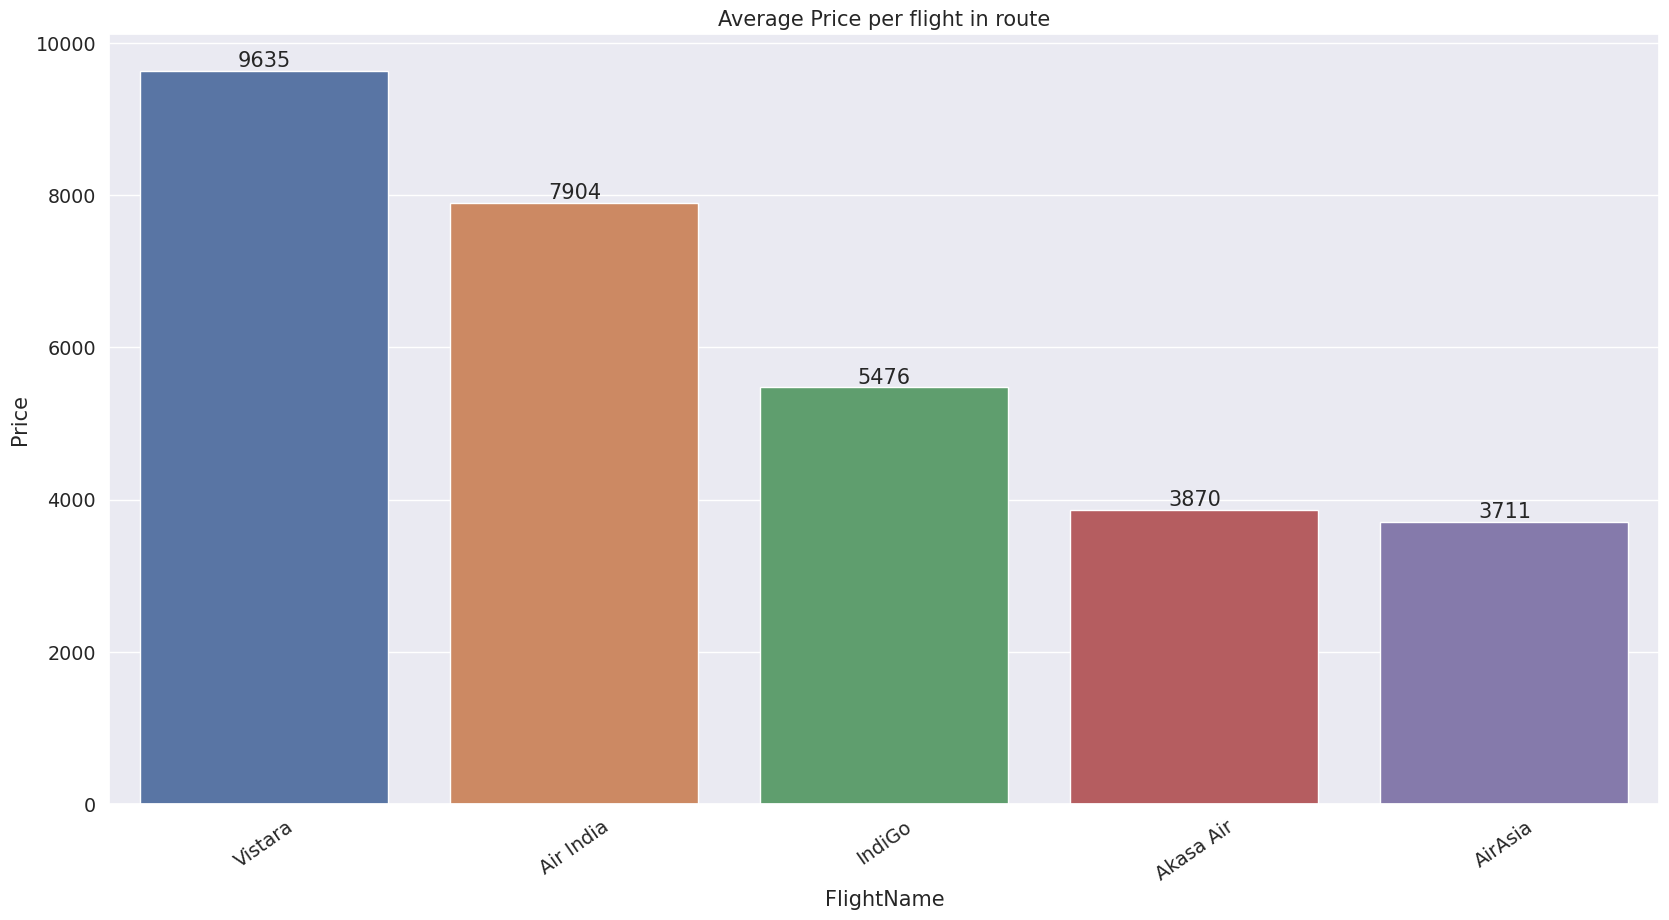

In [41]:
matplotlib.rcParams['figure.figsize'] = (20,10)
df_avg_price = df.groupby('FlightName')['Price'].mean().reset_index().astype({'Price':'int'}).sort_values(by='Price',ascending=False)
p = sns.barplot(x='FlightName',y='Price',data=df_avg_price)
p.bar_label(p.containers[0])
plt.title("Average Price per flight in route")
p.set_xticklabels(labels=df_avg_price["FlightName"], rotation=35)
sns.set(font_scale=1.25)
plt.show()

#### DepartingHour Vs Price

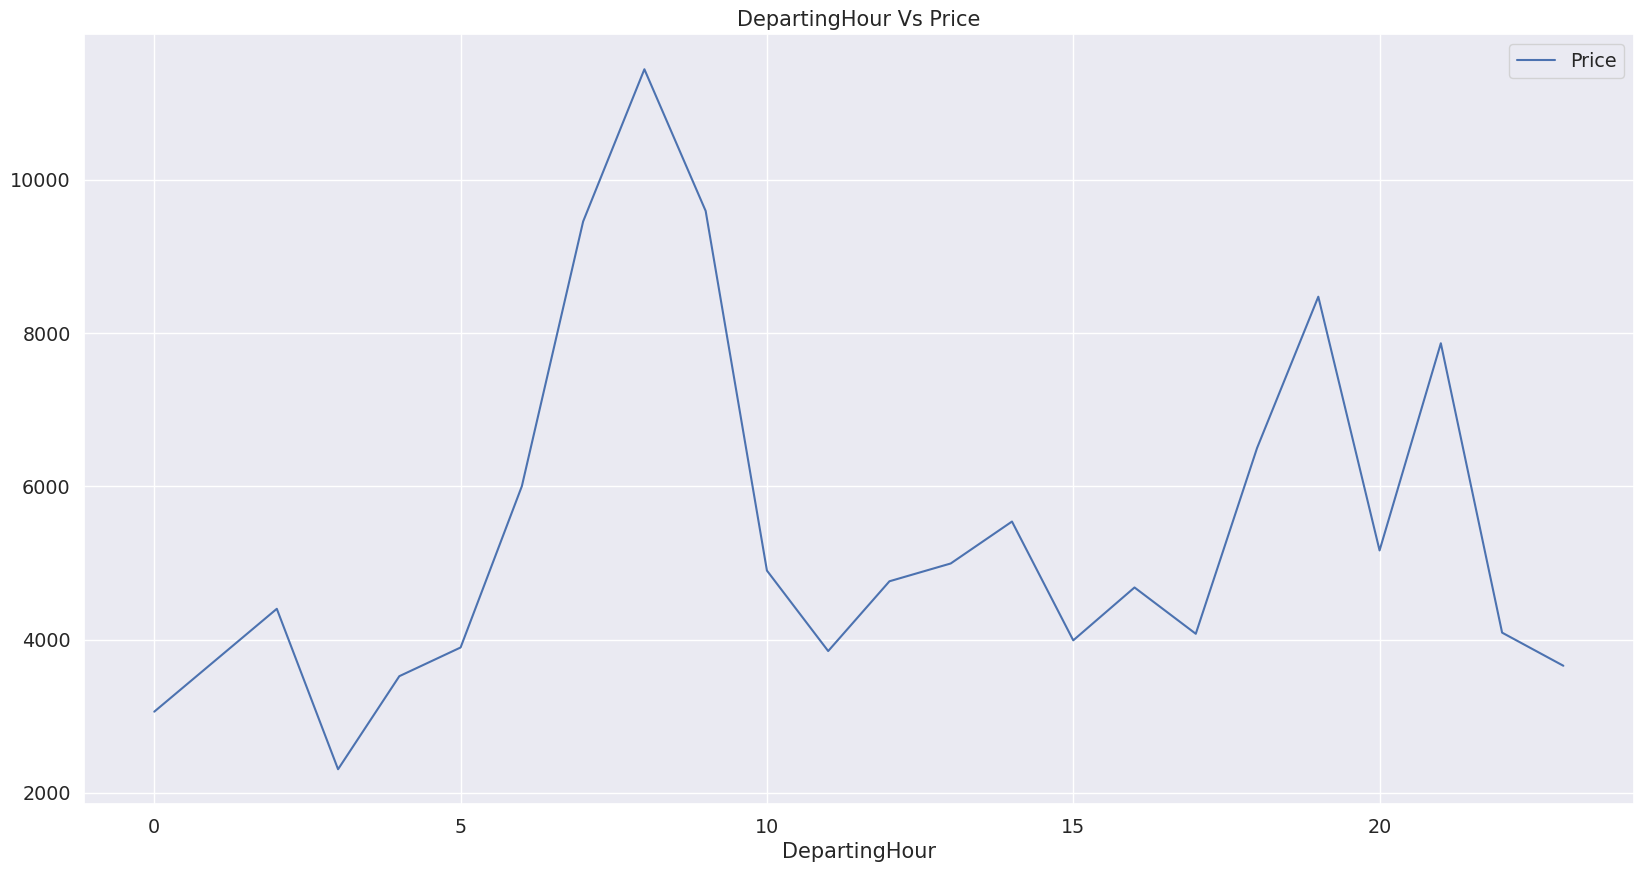

In [42]:
df_dh_avg = df.groupby('DepartingHour')['Price'].mean().reset_index()
df_dh_avg.plot.line(x='DepartingHour',y='Price',title='DepartingHour Vs Price')
plt.show()

Max flight departed in between 5-10

In [43]:
df.shape

(90, 9)

In [44]:
df_avg_p_f = df.groupby('FlightName')['Price'].mean().reset_index().astype({'Price':'int'}).sort_values(by='Price',ascending=False)
df_avg_p_f

,FlightName,Price
4,Vistara,9635
0,Air India,7904
3,IndiGo,5476
2,Akasa Air,3870
1,AirAsia,3711


#### Average price per flight

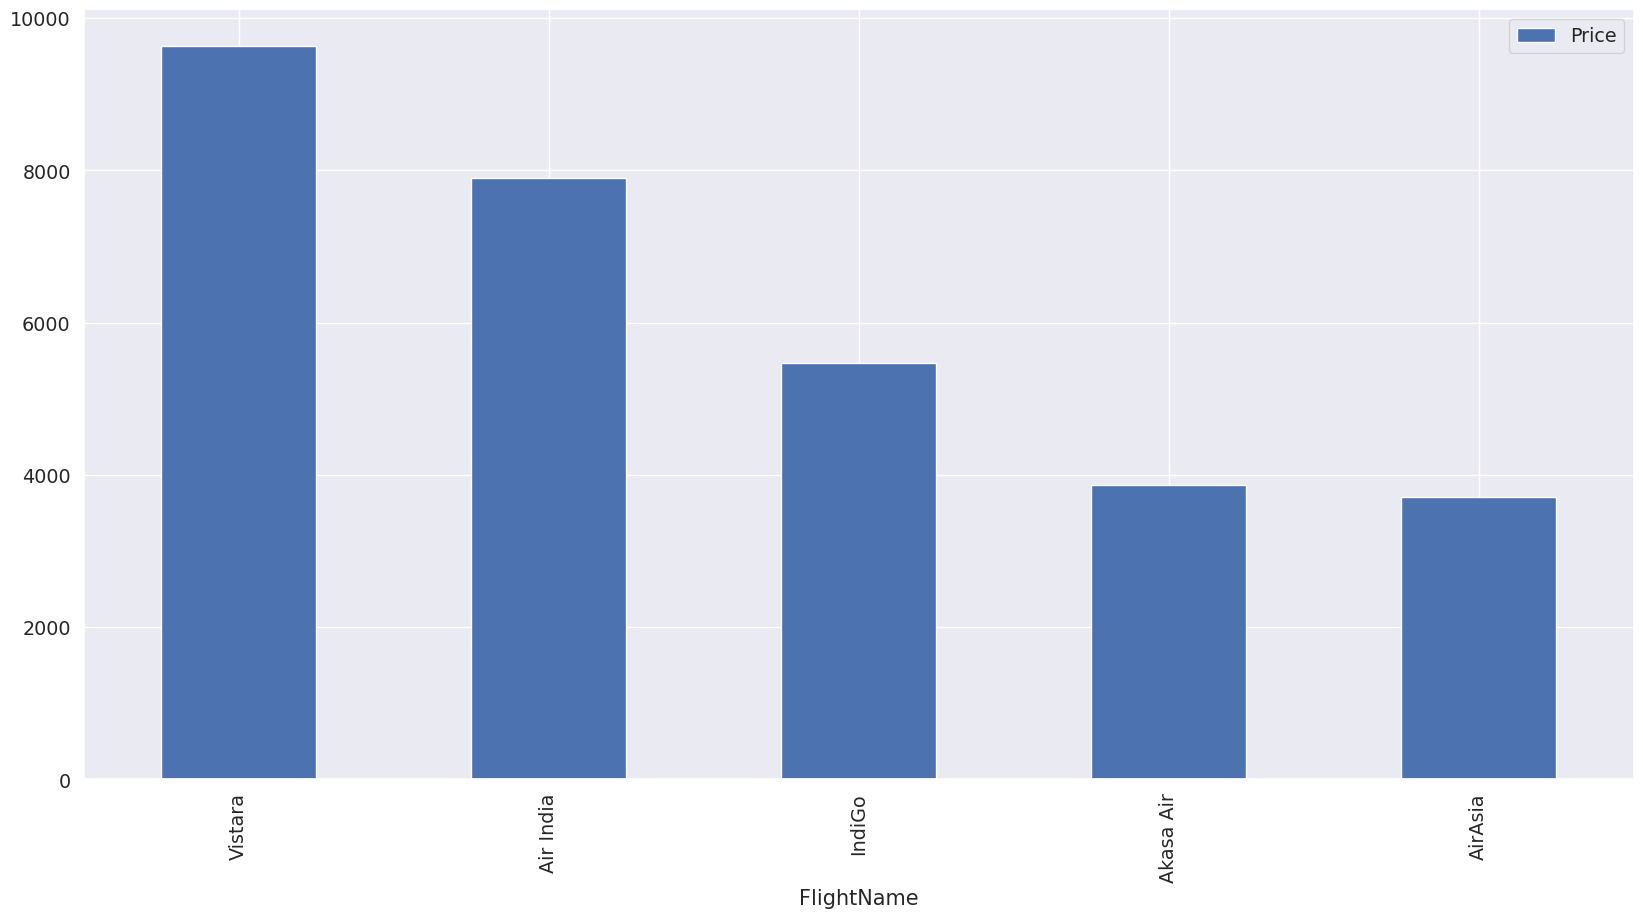

In [45]:
df_avg_p_f.plot.bar(x='FlightName',y='Price')
plt.show()

Vistara is the costliest airline in the country while AirAsia is of min cost.



#### Average price per route

In [46]:
df_avg_route = df.groupby(['DepartingCity','ArrivingCity'])['Price'].mean().reset_index().astype({'Price':'int'}).sort_values(by='Price',ascending=False)
df_avg_route["Route"] = df_avg_route["DepartingCity"]+"↔️"+df_avg_route["ArrivingCity"]
df_avg_route

,DepartingCity,ArrivingCity,Price,Route
0,Bengaluru,Mumbai,6462,Bengaluru↔️Mumbai
1,Mumbai,Bengaluru,5897,Mumbai↔️Bengaluru


 Price of Bangluru to Mumbai is more as compared to Mum to *Bangluru*

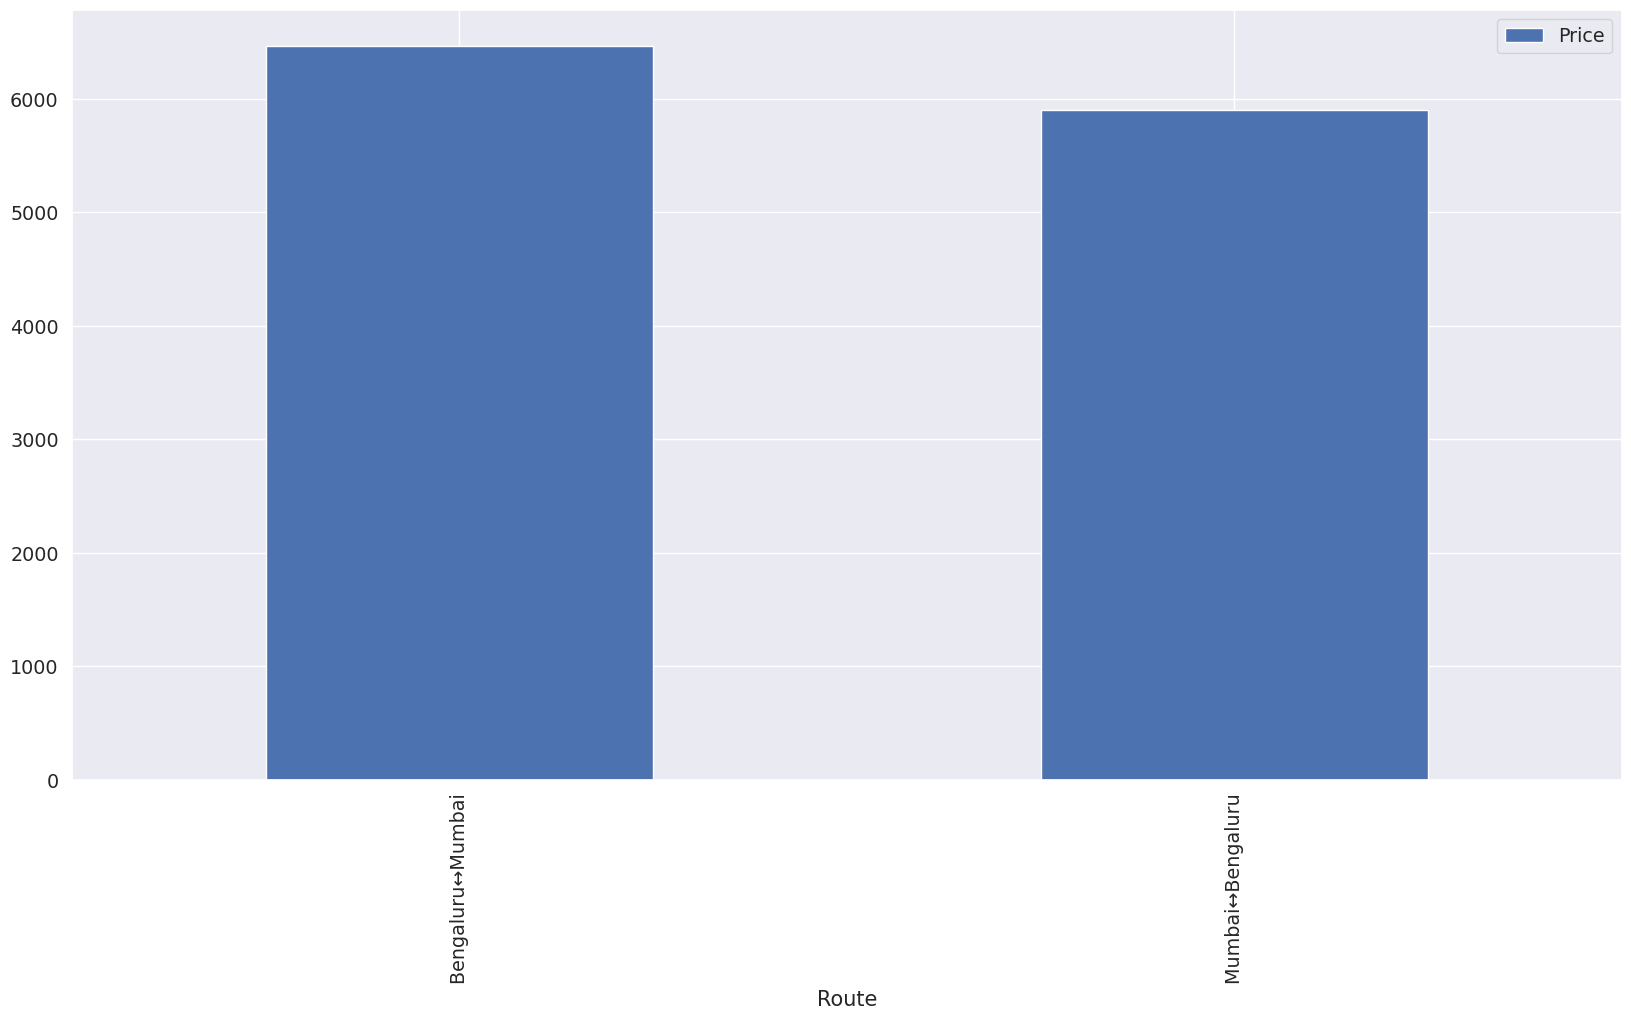

In [47]:
df_avg_route.plot.bar(x='Route',y='Price')
plt.show()

# THANK YOU 🙏